# **Regression project**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## **Load and Explore the Dataset**

In [40]:
df = pd.read_csv('/content/telco.csv')
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [41]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,46.51,0.47,93486.07,36.20,-119.76,22139.60,1.95,32.39,22.96,20.52,64.76,2280.38,1.96,6.86,749.10,3034.38,3.24,58.51,4400.30
std,16.75,0.96,1856.77,2.47,2.15,21152.39,3.00,24.54,15.45,20.42,30.09,2266.22,7.90,25.10,846.66,2865.20,1.20,21.17,1183.06
min,19.00,0.00,90001.00,32.56,-124.30,11.00,0.00,1.00,0.00,0.00,18.25,18.80,0.00,0.00,0.00,21.36,1.00,5.00,2003.00
25%,32.00,0.00,92101.00,33.99,-121.79,2344.00,0.00,9.00,9.21,3.00,35.50,400.15,0.00,0.00,70.55,605.61,3.00,40.00,3469.00
50%,46.00,0.00,93518.00,36.21,-119.60,17554.00,0.00,29.00,22.89,17.00,70.35,1394.55,0.00,0.00,401.44,2108.64,3.00,61.00,4527.00
75%,60.00,0.00,95329.00,38.16,-117.97,36125.00,3.00,55.00,36.39,27.00,89.85,3786.60,0.00,0.00,1191.10,4801.15,4.00,75.50,5380.50
max,80.00,9.00,96150.00,41.96,-114.19,105285.00,11.00,72.00,49.99,85.00,118.75,8684.80,49.79,150.00,3564.72,11979.34,5.00,96.00,6500.00


Handling missing values

In [42]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
Under 30,0
Senior Citizen,0
Married,0
Dependents,0
Number of Dependents,0
Country,0
State,0


Correlation heatmap for numerical features

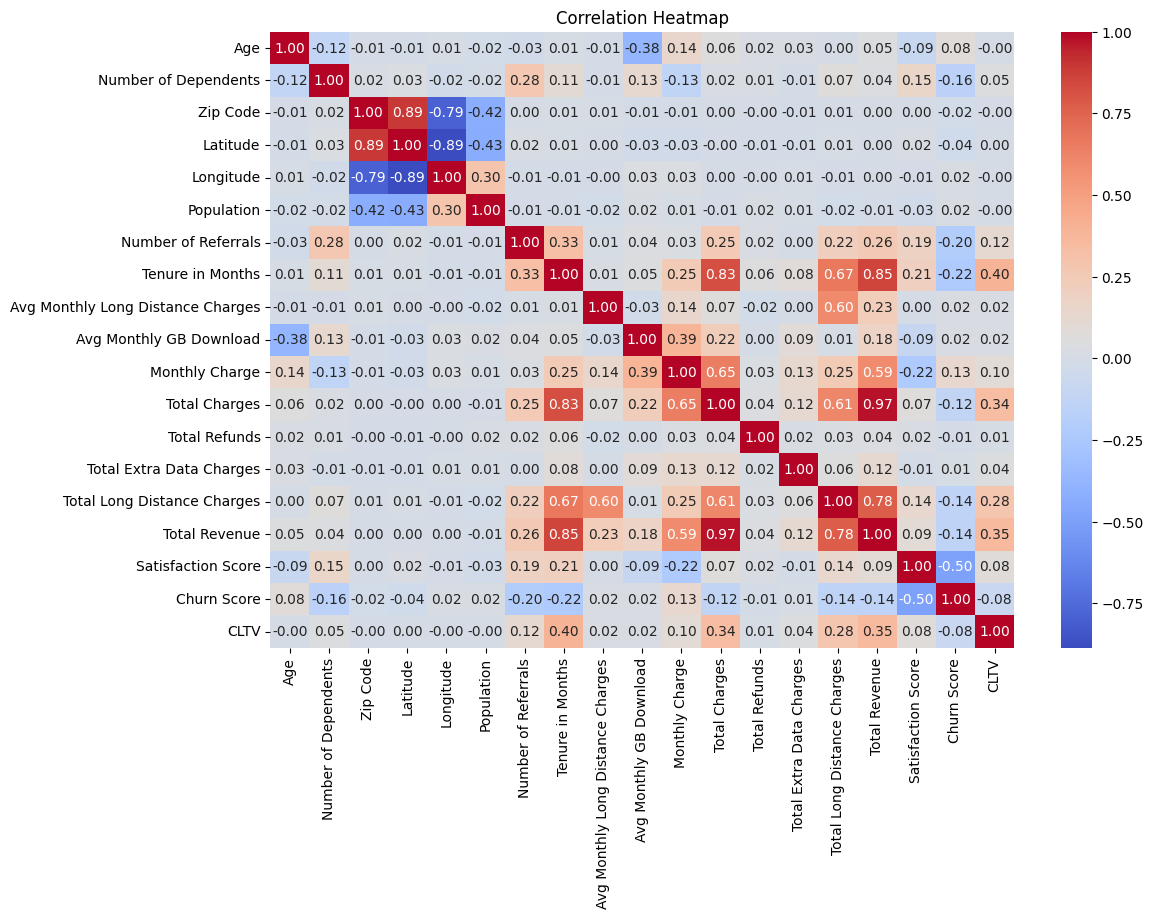

In [43]:
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## **Data cleaning**

In [44]:
# Select relevant features and target variable (e.g., Monthly Charges as predictor and Total Revenue as target)
features = ['Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge']
target = 'Total Revenue'

In [45]:
# Drop rows with missing or invalid data in relevant columns
data = df.dropna(subset=features + [target])

In [46]:
# Define X (features) and y (target)
X = data[features]
y = data[target]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Scale features for better performance with regularization models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train and Evaluate Models

Simple Linear Regression

In [48]:
# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_lin = lin_reg.predict(X_test_scaled)

# Evaluate the model
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f"Linear Regression - MSE: {mse_lin}, R2: {r2_lin}")

Linear Regression - MSE: 768451.7894375831, R2: 0.9039495214421167


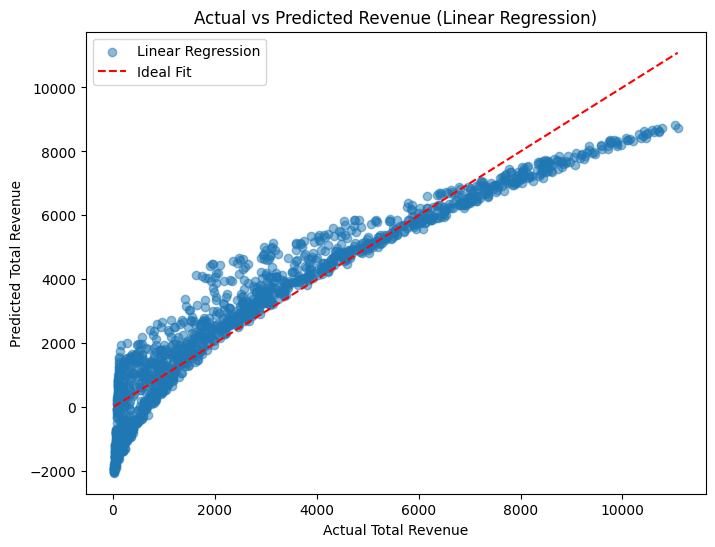

In [49]:
# Plot Actual vs Predicted for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lin, alpha=0.5, label="Linear Regression")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Total Revenue")
plt.ylabel("Predicted Total Revenue")
plt.title("Actual vs Predicted Revenue (Linear Regression)")
plt.legend()
plt.show()

Polynomial Regression

In [50]:
# Add polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train the model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predict on test data
y_pred_poly = poly_reg.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression - MSE: {mse_poly}, R2: {r2_poly}")

Polynomial Regression - MSE: 4821.839545678813, R2: 0.9993973076746548


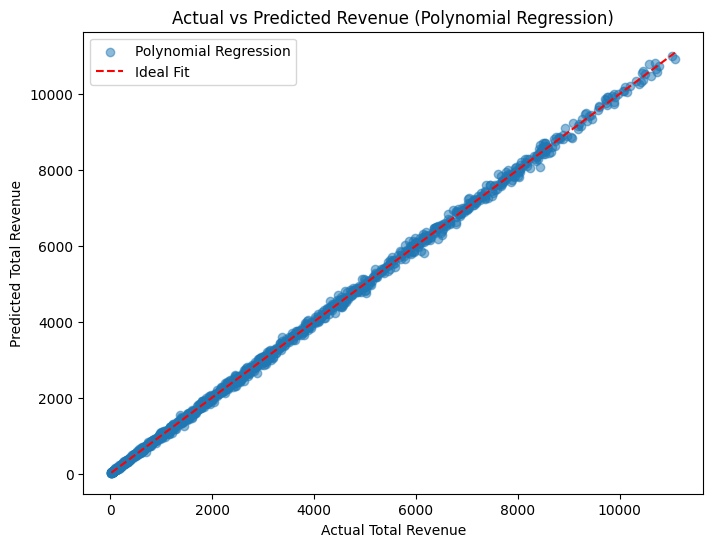

In [51]:
# Plot Actual vs Predicted for Polynomial Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5, label="Polynomial Regression")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Total Revenue")
plt.ylabel("Predicted Total Revenue")
plt.title("Actual vs Predicted Revenue (Polynomial Regression)")
plt.legend()
plt.show()

Ridge Regression

In [52]:
# Train Ridge regression model with alpha=1.0
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}")

Ridge Regression - MSE: 768402.570932276, R2: 0.9039556733712991


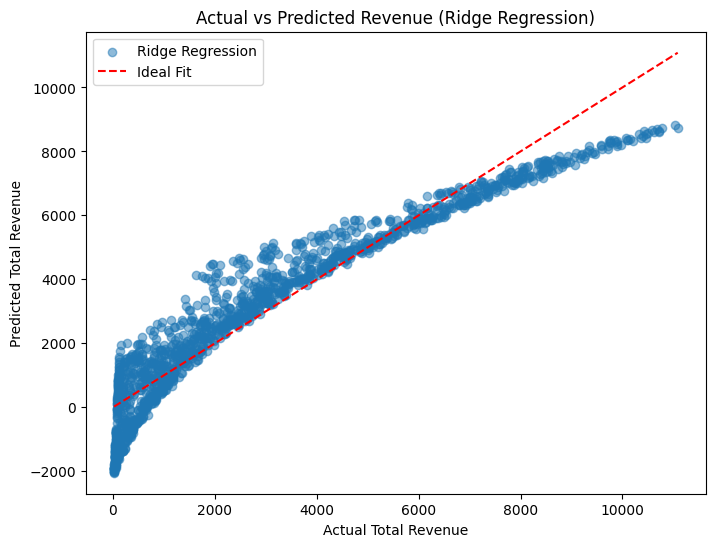

In [53]:
# Plot Actual vs Predicted for Ridge Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label="Ridge Regression")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Total Revenue")
plt.ylabel("Predicted Total Revenue")
plt.title("Actual vs Predicted Revenue (Ridge Regression)")
plt.legend()
plt.show()

Compare models

In [57]:
results = {
    "Model": ["Linear Regression", "Polynomial Regression", "Ridge Regression"],
    "MSE": [mse_lin, mse_poly, mse_ridge],
    "R2": [r2_lin, r2_poly, r2_ridge]
}

results_df = pd.DataFrame(results)
results_df

,Model,MSE,R2
0,Linear Regression,768451.79,0.90
1,Polynomial Regression,4821.84,1.00
2,Ridge Regression,768402.57,0.90


In [55]:
# Feature importance from Ridge regression coefficients
coef = ridge_reg.coef_
feature_importance = pd.DataFrame({"Feature": features, "Coefficient": coef})
feature_importance.sort_values(by="Coefficient", ascending=False, inplace=True)
print("Feature Importance from Ridge Regression:")
print(feature_importance)

# Recommendations for improvement:
print("Recommendations:")
print("- Consider adding interaction terms or non-linear transformations to improve accuracy.")
print("- Experiment with other regularization methods like Lasso or ElasticNet.")
print("- Explore additional features such as customer demographics or service usage patterns.")

Feature Importance from Ridge Regression:
                             Feature  Coefficient
0                   Tenure in Months      2175.15
3                     Monthly Charge      1083.89
1  Avg Monthly Long Distance Charges       488.09
2            Avg Monthly GB Download        -3.92
Recommendations:
- Consider adding interaction terms or non-linear transformations to improve accuracy.
- Experiment with other regularization methods like Lasso or ElasticNet.
- Explore additional features such as customer demographics or service usage patterns.
